In [ ]:
# %reload_ext autoreload

In [111]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from trampact.preprocess import get_data, drop_tx_columns
from trampact.plot import draw_hist

%aimport trampact.preprocess
%aimport trampact.plot
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!pwd

In [112]:
IRIS_T1_CSV = 'iris_T1.csv'
IRIS_T2_CSV = 'iris_T2.csv'
BD_GENT_2006 = 'BD_GENT_2006.csv'
BD_GENT_2016 = 'BD_GENT_2016.csv'

## Load ALL dataframes

#### Load T1 and T2 IRIS codes
Attn: The `get_data()` method automatically sets `iris_id` as the index

In [131]:
iris_T1 = get_data(IRIS_T1_CSV, is_local_csv=True)

In [132]:
iris_T2__full = get_data(IRIS_T2_CSV, is_local_csv=True)

In [133]:
# drop other columns - only keep index (iris_id) and IRIS label (name)
iris_T2 = pd.DataFrame(iris_T2__full['NOM_IRIS'])

#### Load demographic data

In [134]:
bd_gent_2006 = get_data(BD_GENT_2006, is_local_csv=True)

In [135]:
bd_gent_2016 = get_data(BD_GENT_2016, is_local_csv=True)

## Imputing
Do it here before creating new dataframes

#### Take a look at NULL values
Low percentage. We can get away with median (?)

In [145]:
bd_gent_2006.isnull().sum().sort_values(ascending=False) #NaN count for each column
bd_gent_2006.isnull().sum().sort_values(ascending=False)/len(bd_gent_2006) #NaN percentage for each column

t_actifs_2006           0.0
t_chom_2006             0.0
pop_2006                0.0
tx_chom_2006            0.0
tx_empl_2006            0.0
tx_ouvr_2006            0.0
tx_TP_2006              0.0
tx_HLM_2006             0.0
tx_no_transp_2006       0.0
tx_walk_2006            0.0
tx_moto_2006            0.0
tx_voit_2006            0.0
tx_TC_2006              0.0
tx_HH_moins2ans_2006    0.0
tx_HH_2_4ans_2006       0.0
tx_HH_5_9ans_2006       0.0
tx_HH_plus10ans_2006    0.0
tx_HH_with_park_2006    0.0
tx_HH_with_voit_2006    0.0
tx_HH_1voit_2006        0.0
tx_HH_2voit_2006        0.0
HH_2voit_2006           0.0
HH_1voit_2006           0.0
HH_with_voit_2006       0.0
no_transp_2006          0.0
empl_2006               0.0
ouvrier_2006            0.0
TP_2006                 0.0
Int_2006                0.0
app_stage_2006          0.0
cdd_2006                0.0
rev_2006                0.0
HLM_2006                0.0
walk_2006               0.0
HH_with_park_2006       0.0
moto_2006           

In [146]:
bd_gent_2016.isnull().sum().sort_values(ascending=False) #NaN count for each column
bd_gent_2016.isnull().sum().sort_values(ascending=False)/len(bd_gent_2016) #NaN percentage for each column

tx_empl_prec_2016       0.002
tx_TC_2016              0.002
tx_chom_2016            0.002
tx_empl_2016            0.002
tx_ouvr_2016            0.002
tx_TP_2016              0.002
tx_HLM_2016             0.002
tx_no_transp_2016       0.002
tx_walk_2016            0.002
tx_moto_2016            0.002
tx_voit_2016            0.002
tx_HH_moins2ans_2016    0.002
tx_HH_2_4ans_2016       0.002
tx_HH_5_9ans_2016       0.002
tx_HH_plus10ans_2016    0.002
tx_HH_with_park_2016    0.002
tx_HH_with_voit_2016    0.002
tx_HH_1voit_2016        0.002
tx_HH_2voit_2016        0.002
t_chom_2016             0.000
pop_2016                0.000
HH_2voit_2016           0.000
t_actifs_2016           0.000
HH_with_voit_2016       0.000
no_transp_2016          0.000
empl_2016               0.000
ouvrier_2016            0.000
TP_2016                 0.000
Int_2016                0.000
app_stage_2016          0.000
CDD_2016                0.000
rev_2016                0.000
HLM_2016                0.000
walk_2016 

In [137]:
rev_2006_mean_before = bd_gent_2006['rev_2006'].mean()

simp_imputer = SimpleImputer(strategy="mean")

simp_imputer.fit(bd_gent_2006[['rev_2006']])

bd_gent_2006['rev_2006'] = simp_imputer.transform(bd_gent_2006[['rev_2006']])

print(f'rev_2006 - mean: Before {rev_2006_mean_before} , After{simp_imputer.statistics_[0]}') 

rev_2006 - mean: Before 17310.4737394958 , After17310.4737394958


In [138]:
rev_2016_mean_before = bd_gent_2016['rev_2016'].mean()

simp_imputer = SimpleImputer(strategy="mean")

simp_imputer.fit(bd_gent_2016[['rev_2016']])

bd_gent_2016['rev_2016'] = simp_imputer.transform(bd_gent_2016[['rev_2016']])

print(f'rev_2016 - mean: Before {rev_2016_mean_before} , After{simp_imputer.statistics_[0]}') 

rev_2016 - mean: Before 21324.373848523497 , After21324.373848523497


#### Merge datadrames to get quarters ONLY

In [147]:
# bd_gent_2006_T1 = bd_gent_2006.merge(iris_T1, on='iris_id').drop('NOM_IRIS', axis=1)
bd_gent_2006_T1 = bd_gent_2006.join(iris_T1, how='inner').drop('NOM_IRIS', axis=1)

In [148]:
bd_gent_2016_T1 = bd_gent_2016.join(iris_T1, how='inner').drop('NOM_IRIS', axis=1)

#### Drop columns with ratios - We do not always need them

In [149]:
bd_gent_2006_no_tx = drop_tx_columns(bd_gent_2006, '2006')

In [150]:
bd_gent_2016_no_tx = drop_tx_columns(bd_gent_2016, '2016')

In [151]:
bd_gent_2006_T1_no_tx = drop_tx_columns(bd_gent_2006_T1, '2006')

In [152]:
bd_gent_2016_T1_no_tx = drop_tx_columns(bd_gent_2016_T1, '2016')

<hr>

<hr>

## Check dataframes
🚨(no need to run this part if not the first time loading the data frames)🚨

In [ ]:
iris_T1.head()

In [ ]:
iris_T2.head()

In [ ]:
bd_gent_2006

In [ ]:
bd_gent_2016

In [124]:
print(bd_gent_2006.shape)

(500, 44)


In [125]:
print(bd_gent_2016.shape)

(500, 44)


In [126]:
print(bd_gent_2006_T1.shape)

(35, 44)


In [127]:
print(bd_gent_2016_T1.shape)

(35, 44)


In [128]:
print(bd_gent_2006_no_tx.shape)

(500, 25)


In [129]:
print(bd_gent_2016_no_tx.shape)

(500, 25)


<hr>

## Draw histograms - compare 2006 to 2016 and Nice vs. T1/T2

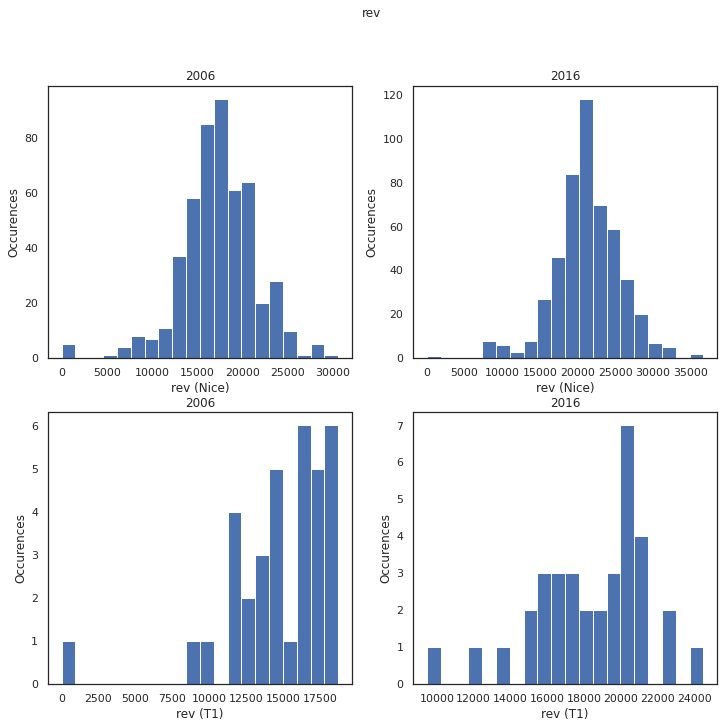

In [153]:
feature_label = 'rev'
draw_hist(bd_gent_2006, bd_gent_2016, bd_gent_2006_T1, bd_gent_2016_T1, feature_label)

## Pearson correlation 🚀

In [154]:
corr = bd_gent_2006_T1_no_tx.corr()

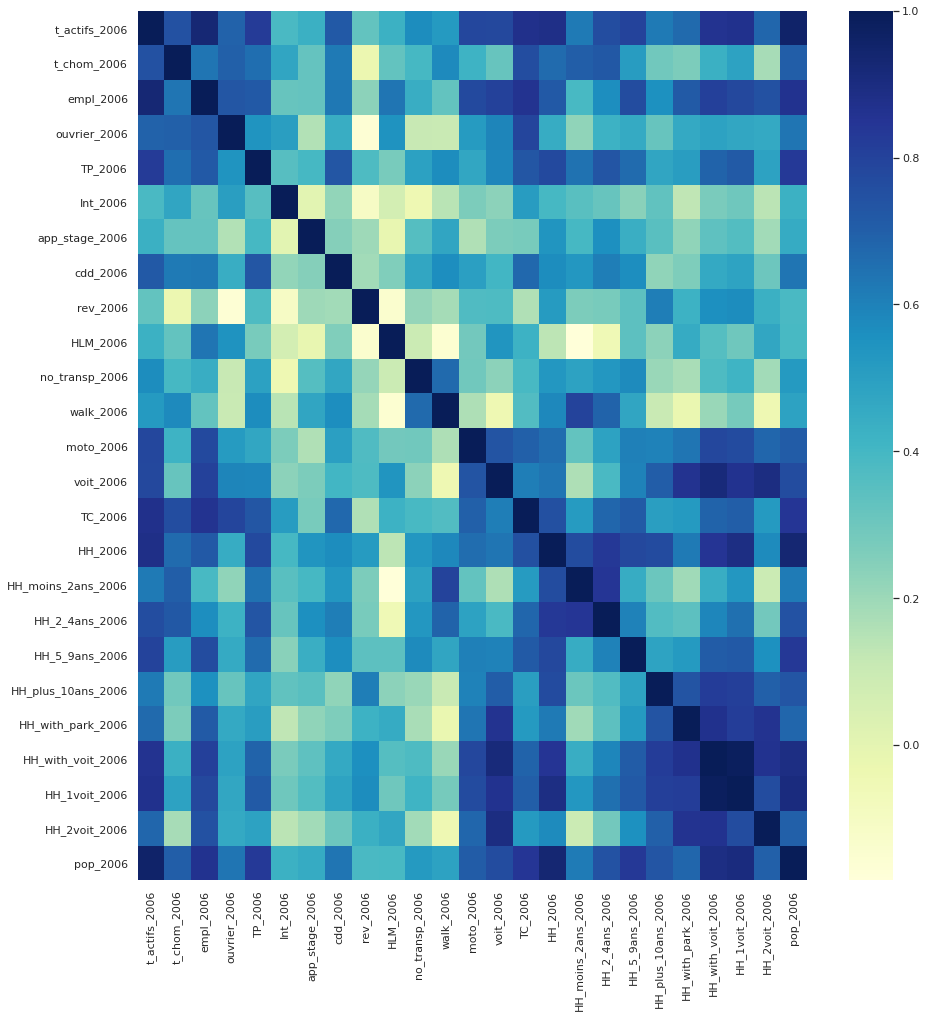

In [155]:
fig, ax = plt.subplots(figsize=(15,16))
ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [168]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.reset_index(inplace=True, drop=True)
corr_df.head()

,feature_1,feature_2,correlation
0,HH_with_voit_2006,HH_1voit_2006,0.985650
1,HH_1voit_2006,HH_with_voit_2006,0.985650
2,pop_2006,t_actifs_2006,0.955644
3,t_actifs_2006,pop_2006,0.955644
4,pop_2006,HH_2006,0.934751


## Pairplots

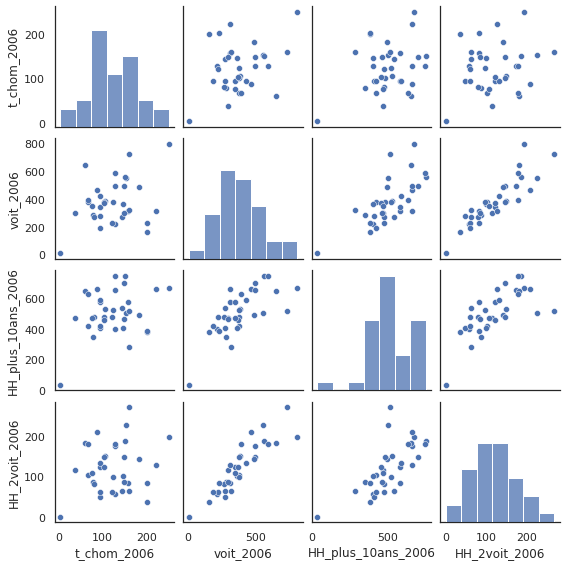

In [169]:
sns.set(style='white')
sns.pairplot(bd_gent_2006_T1_no_tx[['t_chom_2006', 'voit_2006', 'HH_plus_10ans_2006', 'HH_2voit_2006']], height=2)
plt.show()